# Build your first convolutional neural network

(Original : Rodrigo Agundez)

In [1]:
import os

os.environ['KERAS_BACKEND'] = 'tensorflow'

In [2]:
import os
import random

import matplotlib.pyplot as plt
import numpy as np

from keras import datasets
from keras import layers
from keras.models import Sequential
from keras.utils import to_categorical

# from utils import plot_training_summary
# from utils import TimeSummary
# from utils import set_seed

%matplotlib inline

Using TensorFlow backend.


In [3]:
plt.rcParams['figure.figsize'] = 15, 6

## Data 

Like many other libraries, `keras` includes some standard datasets to play around with.
The follow a specific [API](https://www.tensorflow.org/programmers_guide/datasets) that make them iteract nicely with TensorFlow. 

Load the MNIST dataset:

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

Once you've tried this Notebook and made sense of the model, load the CIFAR10 dataset:

In [5]:
# (X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

Get a summary:

In [6]:
print("Train:\tX shape:{X_train.shape}\tY shape:{y_train.shape}\tType (X, y): ({X_train.dtype}, {y_train.dtype})\tX values (max, min): ({X_train.min()}, {X_train.max()})")
print("Test:\tX shape:{X_test.shape}\tY shape:{y_test.shape}\tType (X, y): ({X_test.dtype}, {y_test.dtype})\tX values (max, min): ({X_test.min()}, {X_test.max()})")

Train:	X shape:{X_train.shape}	Y shape:{y_train.shape}	Type (X, y): ({X_train.dtype}, {y_train.dtype})	X values (max, min): ({X_train.min()}, {X_train.max()})
Test:	X shape:{X_test.shape}	Y shape:{y_test.shape}	Type (X, y): ({X_test.dtype}, {y_test.dtype})	X values (max, min): ({X_test.min()}, {X_test.max()})


> #### Homework: Dataset summary
>
- How many training examples do we have?
- How many color channels does each picture have?
- What will the input size to the DNN be?
- What will the output size of the DNN be? 

Show some example images:

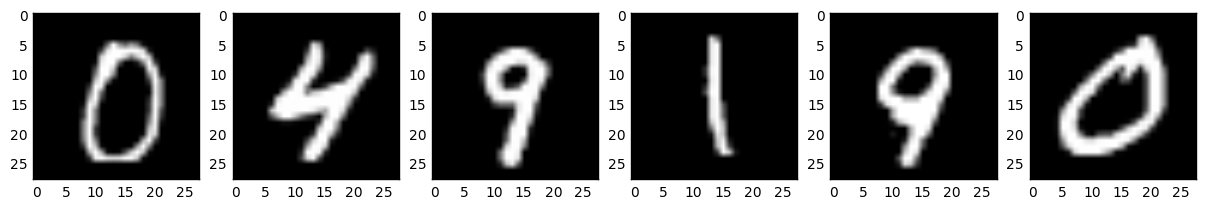

In [7]:
[ax.imshow(random.choice(X_train), cmap='gray') for ax in plt.subplots(1, 6)[1]];

## Preprocessing

- Since we are using a convolutional network we do not need to flatten the array into 1D.
- rescale pixel values between 0 and 1
- Input type should be float
- There are 10 classes so in order to compute the cross entropy loss function we need to one-hot encoded vectors.

In [8]:
if len(X_train.shape) != 4:
    X_train = np.expand_dims(X_train, axis=3)
if len(X_test.shape) != 4:
    X_test = np.expand_dims(X_test, axis=3)

X_train, X_test = X_train.astype('float') / 255, X_test.astype('float') / 255
y_train_onehot, y_test_onehot = to_categorical(y_train), to_categorical(y_test)

Check the resulting dimensions and types:

In [9]:
print("Train:\tX shape:{X_train.shape}\tY shape:{y_train_onehot.shape}\tType (X, y): ({X_train.dtype}, {y_train_onehot.dtype})\tX values (min, max): ({X_train.min()}, {X_train.max()})")
print("Test:\tX shape:{X_test.shape}\tY shape:{y_test_onehot.shape}\tType (X, y): ({X_test.dtype}, {y_test_onehot.dtype})\tX values (min, max): ({X_test.min()}, {X_test.max()})")

Train:	X shape:{X_train.shape}	Y shape:{y_train_onehot.shape}	Type (X, y): ({X_train.dtype}, {y_train_onehot.dtype})	X values (min, max): ({X_train.min()}, {X_train.max()})
Test:	X shape:{X_test.shape}	Y shape:{y_test_onehot.shape}	Type (X, y): ({X_test.dtype}, {y_test_onehot.dtype})	X values (min, max): ({X_test.min()}, {X_test.max()})


## Exercise (solution in utils.py)
Construct a model with the instructions:

- inputs are normalized using BatchNormaliation followed by a Dropout layer with a rate of 0.3
- then add a 2D convolutional layer with a kernel of 3x3
- output from the covolutional layer goes through a MaxPooling layer
- then Flatten the output and add a Dropout layer with a rate of 0.3
- connect the output to a Dense layer
- followed by a BatchNormalization and relu activation function
- then a DropoutLayer
- and finally connect to the output layer with an softmax activation function

dont forget to:

- use the relu activation function or others
- use Dropout layers

In [1]:
def make_CNN_model():
    model = Sequential()
    # input layer transformation (BatchNormalization + Dropout)
    
    # convolutional layer (Conv2D + MaxPooling2D + Flatten + Dropout)
    
    # fully connected layer (Dense + BatchNormalization + Activation + Dropout)
    
    # output layer (Dense + BatchNormalization + Activation)

    return model

make_CNN_model().summary()

NameError: name 'Sequential' is not defined

In [ ]:
model = make_CNN_model()
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
summary = model.fit(
    X_train, y_train_onehot,
    batch_size=5000,
    epochs=5,
    validation_split=0.2,
    verbose=1,
    callbacks=[time_summary]
)

In [ ]:
score = model.evaluate(X_test, y_test_onehot, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])